# Week 8 Lab

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\Â∞àÊ°à\\ÂæÖËôïÁêÜ\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/Â∞àÊ°à/ÂæÖËôïÁêÜ/Waves/bitbucket/github/codes'
    
sys.path.append(path)
 
from thinkx import * 
from waves.sound import * 
from waves.tools.dsp import * 
from waves.tools.dsp.sampling import * 
from waves.tools.dsp.interpolator import * 

## Signal of the Day: Moire Patterns
$$
\begin{align}
x[n] &= cos(\omega_1 n) + cos(\omega_2 n) \\
&= 2cos(\frac{\omega_1-\omega_2}{2} n )cos(\frac{\omega_1+\omega_2}{2} n ) \\
&\approx 2cos(\Delta_\omega n) cos( \omega_1  n ) \\
\end{align}
$$

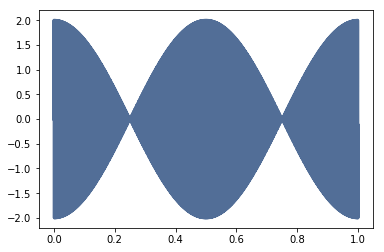

In [3]:
f1 = 440
f2 = f1 + 2
s1 = thinkdsp.SinSignal(f1)
s2 = thinkdsp.SinSignal(f2)
ss = thinkdsp.SumSignal(s1, s2)
w = ss.make_wave(framerate = DEFAULT_FRAMERATE)
w.plot()

### Moire and Aliasing: 1D example

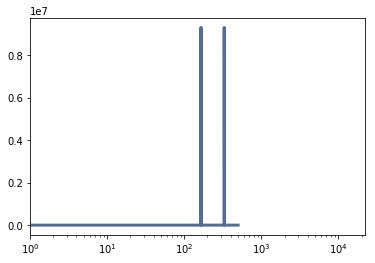

In [4]:
f1 = 165
f2 = f1 * 2
s1 = thinkdsp.SinSignal(f1)
s2 = thinkdsp.SinSignal(f2)
ss = thinkdsp.SumSignal(s1, s2)
w = ss.make_wave(framerate = 1000)
ch = Channel.load_thinkdsp_wave(w)
ch.make_spectrum().plot()

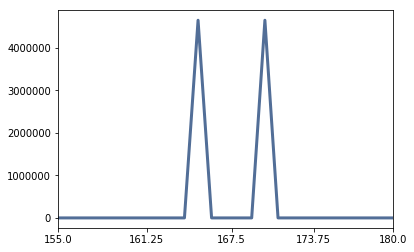

In [5]:
ys = w.ys[::2]
ch = Channel(ys, framerate= 500)  # down sample and the hight frequency will fold back to form beating.
ch.make_spectrum().plot()
xticks = np.linspace(155, 180, 5)
plt.xlim((155, 180))
plt.xticks(xticks, xticks);

In [6]:
tb = ch.make_spectrum()
tb.rank_by_amps()[0][:2]

array([165., 170.])

## 6.2.a Upsampling

To upsample a sequence by a factor of KK, we can implement this in the digital-domain by

- inserting $K-1$ zeros between consecutive samples
- filtering the result with an ideal lowpass filter with cutoff frequency $\frac{\pi}{K} $  

This produces exactly the same result as the operation via the continuous-time domain. Moreover, to recover the original sequence from the up sampled one, we can simply discard all coefficients that are not integer multiple of K.

ÁúæÂ§ö‰ª•n $(n \in \mathbb{Z})$ ÁÇ∫‰∏≠ÂøÉÁöÑsincÊ≥¢ÂΩ¢ $sinc(\frac{t}{Ts} -n)$ ÂΩ¢Êàê Hilbert space ÁöÑ‰∏ÄÁµÑ basis  


#### Analysis (sampling) formula:  
$$x[n] = <x(t), sinc(\frac{t}{Ts} -n)> = Ts \times x(nTs)$$  

#### Synthesis (reconstruction) formula:  
$$x(t) = \frac{1}{Ts}\sum_{n= -\infty}^{\infty} x[n] sinc(\frac{t}{Ts} -n)$$  


#### Re-sampling (operation via the continuous-time domain):  

$$
\begin{align}
x[m] &= original \space descrete \space signal \\
Ts & = interpolation (sampling) \space interval \\ 
x_c(t) &= \frac{1}{Ts} \sum_{m = -\infty}^{\infty} x[m]sinc(\frac{t}{Ts} - m) \\
resample \space interval &=   \frac{Ts}{K} \\ 
x^{\prime}[n] = x_c(n \frac{Ts}{K}) &=\frac{1}{Ts}   \sum_{m = -\infty}^{\infty} x[m]sinc(\frac{n \frac{Ts}{K}}{Ts} - m) \\
&=  \frac{1}{Ts} \sum_{m= -\infty}^{\infty} x[m] sinc(\frac{n }{K } - m) & ------(1) \\
\end{align}
$$

- Áî± $x[n]$ ÂÅö Interpolation ÊàêÁÇ∫ $x(t)$, ÂíåÁî± $x[n]$ ÂÅö re-sampling ÊàêÁÇ∫ $x^{\prime}[n]$ ÈÉΩÊòØ‰∏ÄÁ®Æ interpolation ÁöÑÈÅéÁ®ã„ÄÇ
- ‰ª• K ÂÄçÁéáÂÅö re-samplingÔºåÁõ∏Áï∂ÊñºÊää ÂéüÊú¨ÁöÑ x[m] Â∞ç‰ª•$\frac{n }{K }$ÁÇ∫‰∏≠ÂøÉÁöÑ$ sinc()$ function ÂÅö convolution
- resampling ÂèØË¶ñÁÇ∫‰∏ÄÁ®Æ convolution ÁöÑÂãï‰Ωú
- Êó¢ÁÑ∂Á≠âÂêåÊñº convolutionÔºåÈÇ£È∫ºÂ∞±ÂèØ‰ª•Áî® FIR filter ‰æÜÈÅîÂà∞ resampling ÁöÑÊïàÊûú
- ÂèñÊ®£ÁöÑ Ts ËÆäÂ∞èÔºåÁõ∏Áï∂Êñº $\Omega_N $ËÆäÂ§ß
- Ts ËÆäÊàê 1/KÔºåË°®Á§∫ÊôÇÈñì‰∏äÁöÑËß£ÊûêÂ∫¶ËÆäÈ´òÔºåÂèØ‰ª•Ë°®ÈÅîÁöÑÈ†ªÁéáÁØÑÂúçËÆäÂ§ßÔºå$\Omega_N$ ËÆäÊàê K ÂÄç
- Ts ËÆäÊàê 1/KÔºå‰ΩÜÂéüÊú¨Ë®äËôü x ÁöÑÊôÇÈñìÁ∏ΩÈï∑‰∏¶‰∏çËÆäÔºåÊâÄ‰ª•ÈõñÁÑ∂Á∂ìÈÅé re-sampling ÊâÄÂê´ÁöÑÈ†ªÁéá (Hz) ‰∏¶‰∏çËÆäÔºå‰ΩÜÊòØ $\Omega_N$ Â∑≤Á∂ìËÆäÊàê K ÂÄç„ÄÇ
- Áï∂ resample ‰πãÂæåÔºåÈõ¢Êï£Ë®äËôü‰∏≠ÊâÄ‰ª£Ë°®ÁöÑ frequency ‰∏çËÆäÔºå‰ΩÜÊòØÈ†ªÁéáÁØÑÂúçÊúÉÁî± $\Omega_N$ ËÆäÊàê $\pi$„ÄÇ
- KÁöÑÂÄçÊï∏Ë∂äÂ§ßÔºåÁõ∏Áï∂ÊñºÂéüÊú¨Ë®äËôüË¢´Â£ìÁ∏ÆÂà∞Êõ¥Â∞èÁöÑÈõ¢Êï£È†ªÁéáÁØÑÂúç„ÄÇ
- re-sampling ‰πãÂæåÁöÑ $x^{\prime}[n]$ ÊòØ‰∏ÄÂÄã descrete time signalÔºåÊâÄ‰ª£Ë°®ÁöÑÈ†ªÁéáÁØÑÂúçÊòØ $-\pi \to \pi$ÔºåÊâÄ‰ª•ÊòØÁ∂ìÈÅé KÂÄçÂ£ìÁ∏ÆÁöÑ„ÄÇ
  - $\pi \Rightarrow \Omega_N $ ; Èõ¢Êï£ÁöÑ $\pi$ Áõ∏Áï∂Êñº $\Omega_N$
  - $\Omega_N   \times  K = K\Omega_N $ ;   $\Omega_N$ ÊîæÂ§ß K ÂÄç
  - $K\Omega_N \Rightarrow \pi $ ; K ÂÄçÁöÑ$\Omega_N$ Áõ∏Áï∂Êñº $\pi$ÔºåÂéüÊú¨ÁöÑÈ†ªË≠úÂÖßÂÆπË¢´Â£ìÊâÄÂà∞‰∏ÄÂÄãËºÉÂ∞èÁöÑÈ†ªÁéáÁØÑÂúç‰∏≠„ÄÇ

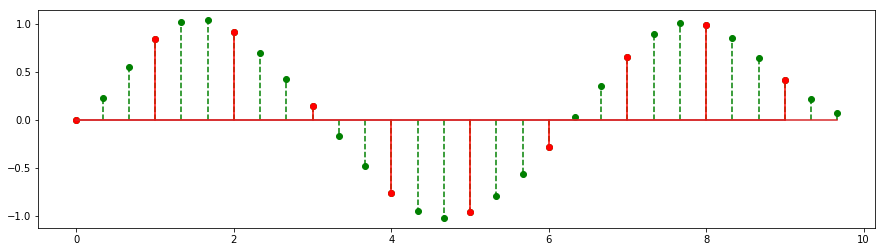

In [7]:
from waves.tools.dsp.interpolator import *


t = np.arange(10)

x = np.sin(t)
K = 3
n, x1 = Multirate.upsample(x, K)

plt.figure(figsize = (15, 4))
plt.stem(n, x1, linefmt = 'g--', markerfmt = 'go')
plt.stem(t, x, linefmt = 'r-', markerfmt = 'ro')
plt.show()

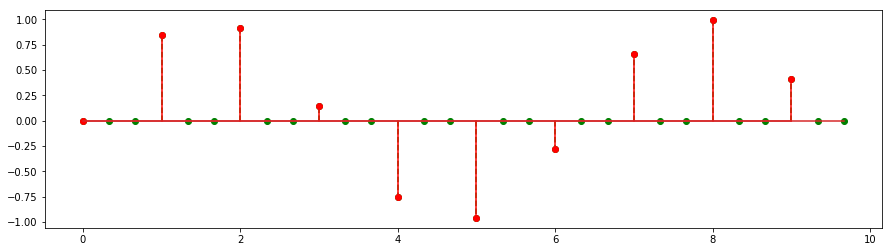

In [8]:
# ‰ΩøÁî® EPFL Êèê‰æõÁöÑ multirate.upsample ÂáΩÊï∏ÔºåÂè™ÊúÉÁ≠âË∑ùÊèíÂÖ• K-1 ÂÄã 0

from waves.tools.dsp.sampling import *


t = np.arange(10)

x = np.sin(t)
K = 3
x1 = multirate.upsample(x, K)

plt.figure(figsize = (15, 4))
plt.stem(np.arange(len(x1))/K,  x1, linefmt = 'g--', markerfmt = 'go')
plt.stem(t, x, linefmt = 'r-', markerfmt = 'ro')
plt.show()

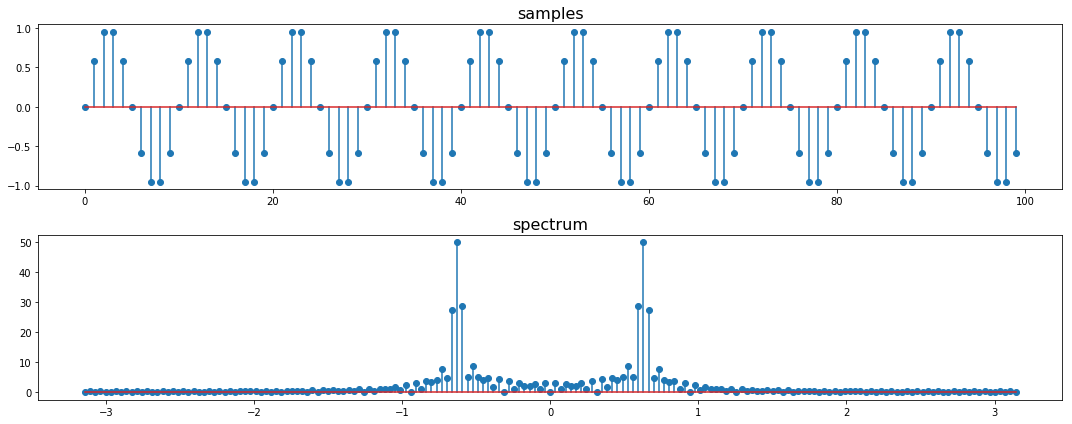

In [9]:
s = thinkdsp.SinSignal(10)
w = s.make_wave(duration = 1, framerate = 100)
YS = fourier.dtft(w.ys)

### up sample ‰∏âÂÄç‰πãÂæåÔºö
- Ê≥¢ÂΩ¢ÁúãËµ∑‰æÜ‰∏ÄÊ®£Ôºå‰ΩÜÊòØ X Ëª∏ÁöÑÈï∑Â∫¶ËÆäÁÇ∫‰∏âÂÄç
- ‰ª• descrete ÁöÑËßÄÈªû‰æÜÁúãÔºåÊØè‰∏ÄÈªûx‰πãÈñì yÁöÑËÆäÂåñËºÉÂ∞èÔºåË°®Á§∫Ë°®ÈÅîÁöÑËÉΩÂäõËºÉÂº∑ÔºåÂèØ‰ª•ÂÆπÁ¥çËàáË°®ÈÅîÁöÑÈ†ªÁéáÁØÑÂúçËºÉÂ§ß
  - ÊØè‰∏ÄÈªûx‰πãÈñì yÁöÑËÆäÂåñËºÉÂ∞èÔºåË°®Á§∫Â∞çÊñº xËª∏ÈñìÈöî‰æÜË™™ÔºåÊ≠§Ë®äËôüÁöÑÈ†ªÁéáËºÉ‰Ωé
- Â∞çÂêå‰∏ÄÂÄãË®äËôü‰æÜË™™Ôºå
  - Ts ËÆäÂ∞èÔºå
  - ÂÅö up sample‰πãÂæåÔºåTs ËÆäÂ∞è:
    - $\Omega_N$ Â∞±ËÆäÂ§ßÔºå‰ΩÜÊòØ...
    - ÂÅö DTFT ‰πãÂæå Ëß£ÊûêÂá∫‰æÜÁöÑÈ†ªÁéáÁØÑÂúçÈÇÑÊòØ  $ [-\pi , \pi]$ 
    - Ë®äËôüÈ°ØÂæóË°åÂãïÁ∑©ÊÖ¢ÔºåÊ≠§Ë®äËôüÁöÑÈ†ªÁéáÂú® $ [-\pi , \pi]$ ÁØÑÂúç‰∏≠Âá∫ÁèæÁöÑ‰ΩçÁΩÆÊúÉÁ∏ÆÂ∞èÔºåËÄåÂæÄ‰∏≠Â§ÆÈù†Êîè„ÄÇ 
  - ÊâÄ‰ª•ÂÅö up sample ÊúÉÂ∞áÈ†ªË≠úÂ£ìÁ∏Æ„ÄÇ

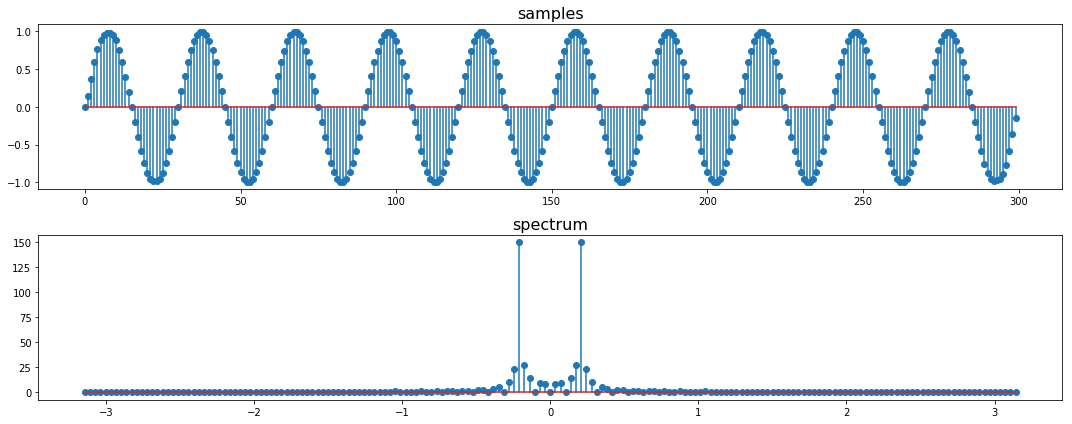

In [10]:
_, ys1 = Multirate.upsample(w.ys, 3)
YS1 = fourier.dtft(ys1)

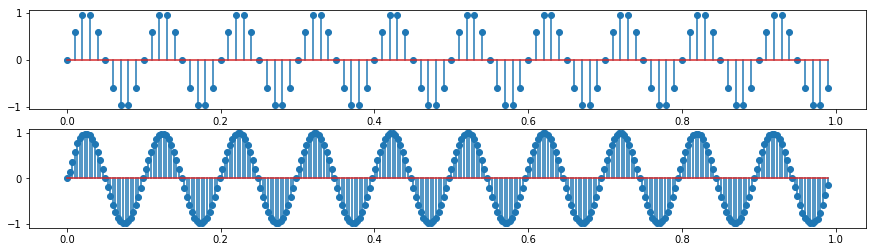

In [11]:
# Ê∏¨Ë©¶ scale_t ÁöÑÂäüËÉΩ

plt.figure(figsize = (15, 4))
plt.subplot(2, 1, 1)
plt.stem(w.ts, w.ys)
plt.subplot(2, 1, 2)
plt.stem(Multirate.scale_t(w.ts, K), ys1);  # Ê∏¨Ë©¶ scale_t ÁöÑÂäüËÉΩ

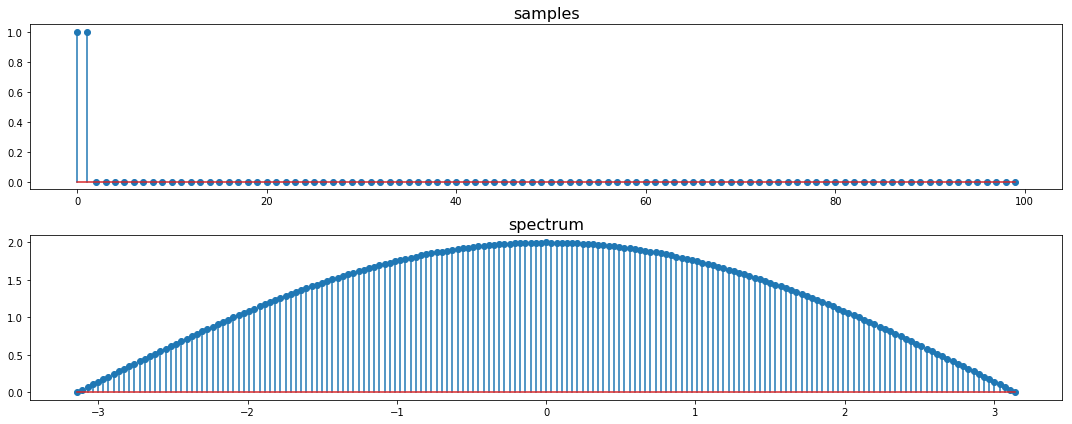

In [12]:
d = np.zeros(100)
d[:2] =1
D = fourier.dtft(d)

### Â¶ÇÊûúÊúâ interpolateÔºåÂâáÂè™ÊúÉÂá∫Áèæ‰∏ªÈ†ªË≠ú

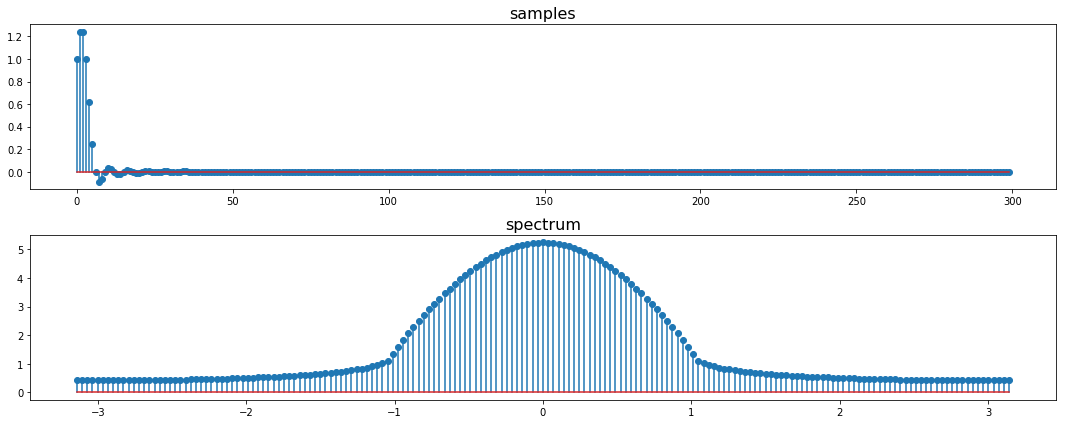

In [13]:
_, d1 = Multirate.upsample(d, 3)
D1 = fourier.dtft(d1)

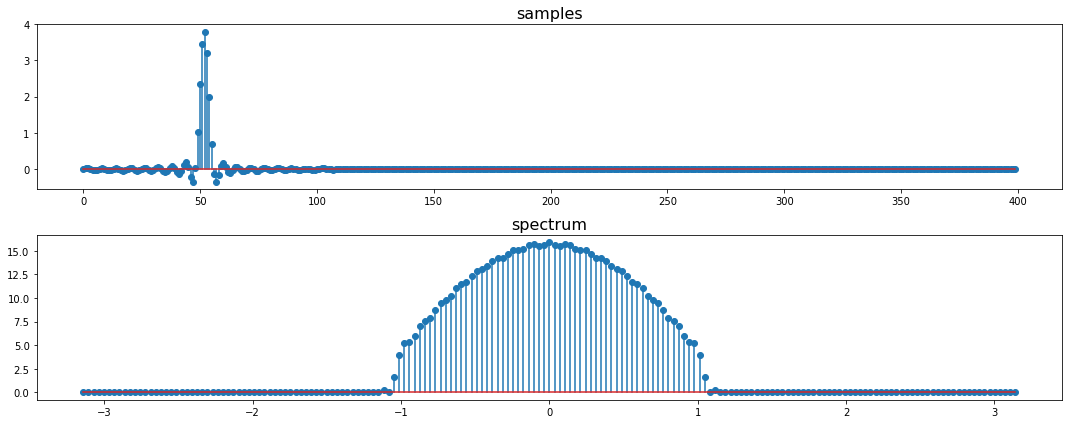

In [14]:
N = len(d) // 2

d2 = np.convolve(d1, np.sinc(np.arange(-N, N+1)/K))
D2 = fourier.dtft(d2)

### Â¶ÇÊûúÂè™ÊòØ ÊèíÂÖ•0ÂÅö up samplingÔºå‰ΩÜÊòØÊ≤íÊúâ interpolate
- ‰ΩøÁî® EPFL Êèê‰æõÁöÑ multirate.upsample ÂáΩÊï∏ÔºåÂè™ÊúÉÁ≠âË∑ùÊèíÂÖ• K-1 ÂÄã 0
- ÂâáÊúÉÊää $[-3\pi, 3\pi]$ ÁØÑÂúçÂÖß ‰∏âÂÄçÂ£ìÁ∏ÆÊàê  $[-\pi, \pi]$ ÔºåËÄåÂá∫ÁèæÂ§öÂÄãÂâØÊú¨È†ªË≠ú  

$$
\begin{align}
X_U(e^{j\omega}) &= \sum_{m=-\infty}^{\infty} X_U[m] e^{-j\omega m}  &   x_U[m] = 0 \space when \space  m \neq n k  \\
&= \sum_{n=-\infty}^{\infty} X[n] e^{-j\omega nK}  \\
&= X(e^{j\omega K})
\end{align}
$$  

#### ÂÅö K ÂÄç ÁöÑ Up sampleÔºåÂÖ∂È†ªË≠úÁ≠âÊñºÊòØÂéü‰æÜÁöÑÈ†ªË≠ú‰Ωú È†ªÁéá‰∏äÁöÑ K ÂÄçÂ£ìÁ∏Æ„ÄÇ

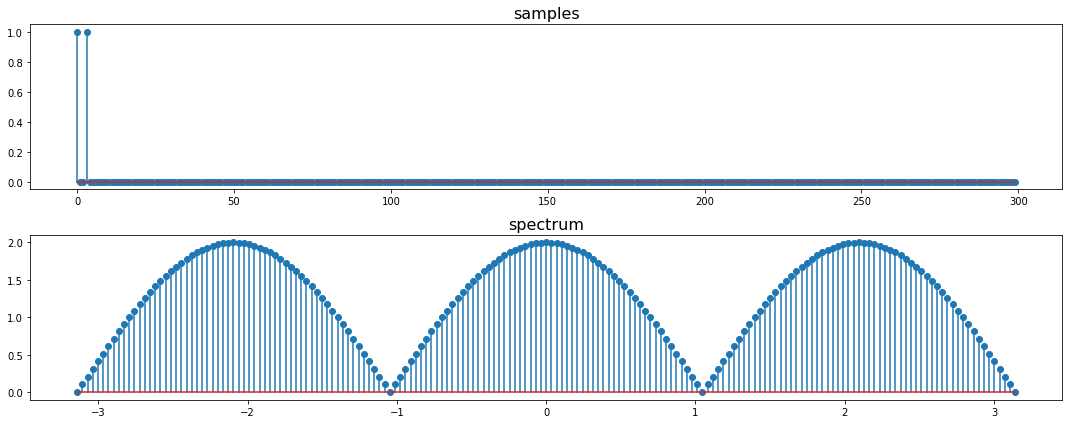

In [15]:
# ‰ΩøÁî® EPFL Êèê‰æõÁöÑ multirate.upsample ÂáΩÊï∏ÔºåÂè™ÊúÉÁ≠âË∑ùÊèíÂÖ• K-1 ÂÄã 0

d1 = multirate.upsample(d, 3)
D1 = fourier.dtft(d1)

### ÊñΩÂä†‰∏ÄÂÄã low-pass filter
- Âõ†ÁÇ∫ Âéü‰æÜÂÅö K=3 ÁöÑ up sampling
- ÁèæÂú®ÊñΩ‰ª•‰∏ÄÂÄã $\omega_{cut} = \frac{\pi}{K}$ ÁöÑ low-pass ideal filter
- Á≠âÊñº‰ª• $sinc(\frac{n}{K}) $ ÂÅö convolutionÔºåÂõ†ÁÇ∫ since ÁöÑ DTFT ÊòØ rect  

$$
\begin{align}
x^{\prime}[n] &= x_U(n) * sinc(\frac{n}{K})  \\
&= \sum_{i = -\infty}^{\infty} x_U[i] sinc(\frac{n-i}{K})   &   x_U[i] = 0 \space when \space  i \neq m k  \\
&= \sum_{m=-\infty}^{\infty} x[m] sinc(\frac{n}{K} - m)  & ------(2) \\
\end{align}
$$  

ÂÖ¨Âºè (1), (2) ÊòØÁõ∏ÂêåÁöÑÔºåÊâÄ‰ª•‰∏ãËø∞ÂÖ©ËÄÖÁöÑÊïàÊûúÁõ∏Âêå:
- ‰ª• $sinc(\frac{n}{K}) $ Â∞ç $x[m]$ ÂÅö convolution ÂÅö up sampling
- Á≠âË∑ùÊèíÂÖ• k-1 ÂÄã 0 ÂÅö up-sampling ÂæóÂà∞ $x_U[n]$ ‰∏¶‰ª• $sinc(\frac{n}{K}) $ Â∞ç $x_U[n]$ ÂÅö low-pass filtering

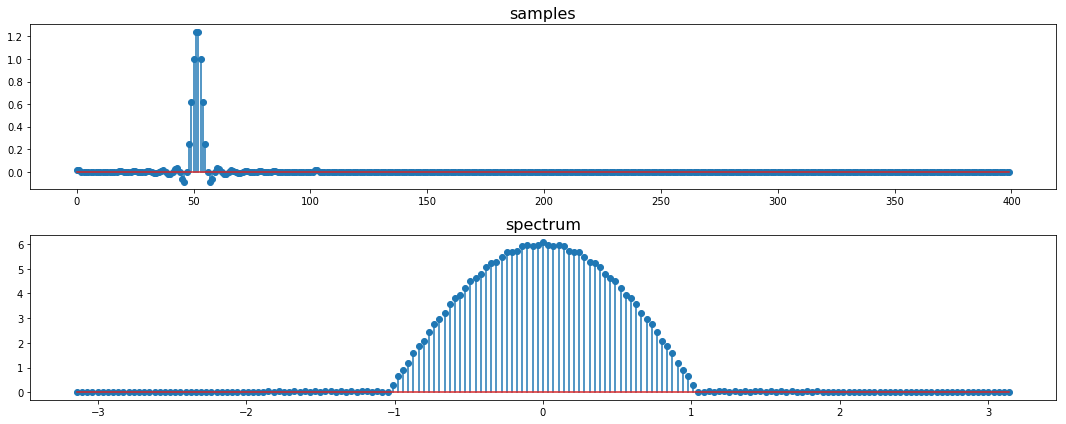

In [16]:
N = len(d) // 2
d2 = np.convolve(d1, np.sinc(np.arange(-N, N+1)/K))  
D2 = fourier.dtft(d2)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


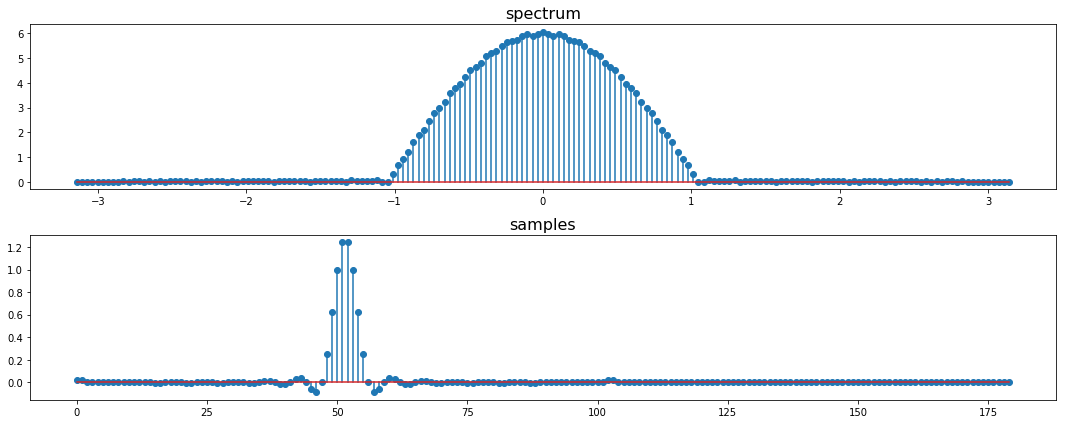

In [17]:
_ = fourier.idtft(D2)

### ÊâÄ‰ª•ÔºåÂè™ÊòØ:
- Á≠âË∑ùÊèíÂÖ• K-1 ÂÄã 0 ÂÅö K ÂÄç up sampling Â∞±ÂèØÂ∞áÈ†ªË≠úÂ£ìÁ∏ÆÔºå
- Âè™ÈúÄË¶ÅÂÜç‰ª•  $sinc (\frac{n}{K}) $ ÂÅö convolution ÊñΩÂä† low-pass filter Â∞±ÂèØ‰ª•ÂéªÈô§‰∏ÄÂêåË¢´Â£ìÁ∏ÆÈÄ≤‰æÜÁöÑÈ´òÈ†ªË®äËôü-

## 6.2.b Fitting the transmitter spectrum
- Given the bandwidth constraint given by $F_{min}$ and $F_{max}$ , 
- let $ W$ be the positive bandwidth $W = F_{max} - F_{min}$ and 
- let us choose the sampling frequency such that $F_s > 2F_{max}$ and
- $F_s = KW$. When we translate this specification in the digital domain, 
- we can simply upsample the original sequence by a factor $K$ to shrink its bandwidth from $2\pi$ to $2\pi/K$. 
- This upsampling operation does not change the data rate and we transmit $W$ symbols per second. 
- $W$, the positive bandwidth of a channel, is referred to as the ***Baud rate*** of the system.

$$
\begin{align}
W &= F_{max} - F_{min}  \\
pick \space F_s &> 2 F_{max}  \\
let \space F_s &= KW  \\
\omega_{max} - \omega_{min} &= 2 \pi \frac{W}{F_s} \\
&= 2\frac{\pi}{K} \\
\end{align}
$$  

Set $F_s = KW$, then we can simply upsample by K.

### Raised Cosine
https://en.wikipedia.org/wiki/Raised-cosine_filter

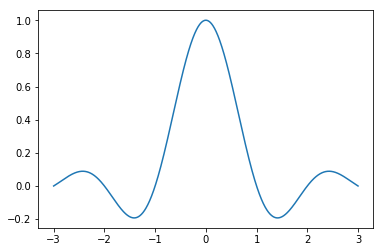

In [18]:
t = np.linspace(-3, 3, 1000)
plt.plot(t, filtering.raised_cosine(t, period = 1, beta = 0.25));

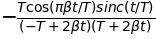

In [19]:
# Áî® SymPy Á∞°Âåñ

beta, T, t = symbols('beta, T, t', real = True)

h = Piecewise((pi/(4*T) * sinc(1/(2*beta)), abs(t) == T/(2*beta)), 
              (1/T*sinc(t/T)*cos(pi*beta*t/T)/(1-(2*beta*t/T)**2), True))

h.collect(t).factor()

### ÈÄôÊòØ‰ª• T (Ts) ÁÇ∫ÂñÆ‰ΩçÁöÑ sinc ÂáΩÊï∏ÁöÑËÆäÂΩ¢
- $t = 0$ ÁöÑÊôÇÂÄôÔºåRC ÂáΩÊï∏ÁöÑÂÄº = $\frac{T}{T^2} = \frac{1}{T} $
- ÊØèÁï∂ t ÊòØ T ÁöÑÊï¥Êï∏ÂÄçÊï∏ÁöÑÊôÇÂÄôÔºåRC = 0

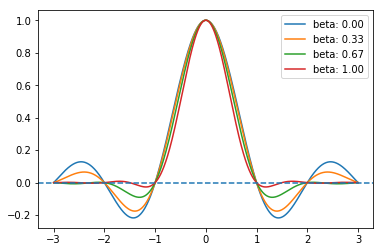

In [20]:
t = np.linspace(-3, 3, 1000)

for b in np.linspace(0, 1, 4):
    plt.plot(t, filtering.raised_cosine(t, period = 1, beta = b), label = 'beta: {:0.2f}'.format(b))
    
plt.axhline(0, ls = '--')
plt.legend();

In [21]:
# Áî® SymPy Á∞°Âåñ h ÁöÑÈ†ªÁéáÈüøÊáâ H

beta, T, f = symbols('beta, T, f', real = True)

H = Piecewise(( 1/2*(1+cos(pi*T/beta*(abs(f)-(1-beta)/(2*T)))), ((1-beta)/(2*T) < abs(f))  & (abs(f) <= (1+beta)/(2*T)))   ,
              (1, abs(f)<= (1-beta)/(2*T)),(0, True),
              (0, True)) 

H.rewrite(cos).collect(f).factor()

‚éß         ‚éõœÄ‚ãÖT‚ãÖ‚îÇf‚îÇ    œÄ ‚éû                   Œ≤     1             Œ≤     1 
‚é™- 0.5‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ - ‚îÄ‚îÄ‚îÄ‚éü + 0.5  for ‚îÇf‚îÇ ‚â§ ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ ‚àß ‚îÇf‚îÇ > - ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ
‚é™         ‚éù   Œ≤      2‚ãÖŒ≤‚é†                  2‚ãÖT   2‚ãÖT           2‚ãÖT   2‚ãÖT
‚é™                                                                       
‚é®                                                      Œ≤     1          
‚é™              1                          for ‚îÇf‚îÇ ‚â§ - ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ         
‚é™                                                     2‚ãÖT   2‚ãÖT         
‚é™                                                                       
‚é©              0                                otherwise               

### RCÂáΩÊï∏ÁöÑ frequency response 
- Áî®‰æÜÂÅö‰ΩéÈÄöÊøæÊ≥¢ÁöÑ
- ÂÖ∂ cutoff frequency = $\frac{1}{2 T_s} = \frac{\Omega_N}{2\pi}$
  - $ \frac{\pi}{T_s} = \Omega_N   $
  - $ \frac{1}{T_s} = \frac{\Omega_N}{\pi}  $
  - $ \frac{1}{2 T_s} = \frac{\Omega_N}{2\pi} $
- Áï∂ $\beta = 0$ ÁöÑÊôÇÂÄôÔºåf ÂøÖÈ†àÂú® $[-\frac{1}{2T_s},\frac{1}{2T_s}]$ ‰πãÈñì H ÊâçÊúÉÊúâÂ§ßÊñºÈõ∂(= 1)ÁöÑÂÄº

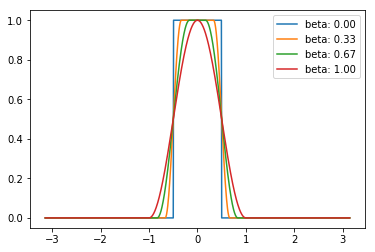

In [22]:
f = np.linspace(-np.pi, np.pi, 1000)
for b in np.linspace(1e-7, 1, 4):
    plt.plot(f, filtering.raised_cosine_response(f, period = 1, beta = b), label = 'beta: {:0.2f}'.format(b))

plt.legend();

### RC filter ÁöÑ‰ΩøÁî®ÊñπÂºè

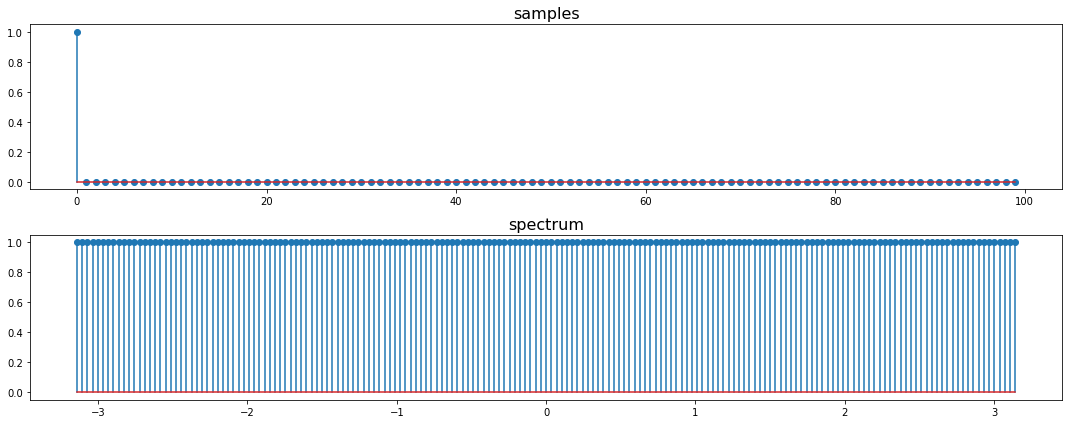

In [23]:
# Delta Ë®äËôüÔºåÂÖ®È†ª
delta = np.zeros(100)
delta[:1] =1
Delta = fourier.dtft(delta)

### RC ÁöÑÁèæË±°
- RC impulse response ÁöÑÈï∑Â∫¶Âè™ÂèóÂà∞ ÊåáÂÆöÁöÑÊï¥Êï∏Â§ßÂ∞è(N) Ëàá Êï¥Êï∏‰πãÈñì steps_between ÁöÑÂΩ±Èüø (N * 2 * steps_between + 1)
- RC impulse response ÁöÑÈï∑Â∫¶Ë∂äÈï∑ÔºåÈ†ªÁéáÈüøÊáâË∂äÁ≤æÁ¢∫Ôºå‰ΩÜÊòØË∂äÊ∂àËÄóÊïàËÉΩ
- ‰∏çË´ñ RC impulse response ÁöÑÈï∑Â∫¶ÊúâÂ§öÈï∑ÔºåÂÖ∂È†ªÁéáÈüøÊáâÈÉΩÊòØ‰∏ÄÊ®£ÁöÑÔºåÂè™Ë∑ü T (symbol period) ÊúâÈóúÔºåcutoff freq = $\frac{1}{2T}$
- Êää RC ÁöÑÊ≥¢ÂΩ¢ Âú® t = K T ÁöÑÊôÇÂÄô = 0 (RC(KT) = 0ÔºåKÂíåK+1‰∏≠ÈñìÂàáÂàÜ 1/TÁ≠âÂàÜÔºåÂàáÂæóË∂äÂ§öÔºåÂ∞çÈ†ªË≠úÂ£ìÁ∏ÆÂæóË∂äÂ§ö„ÄÇ

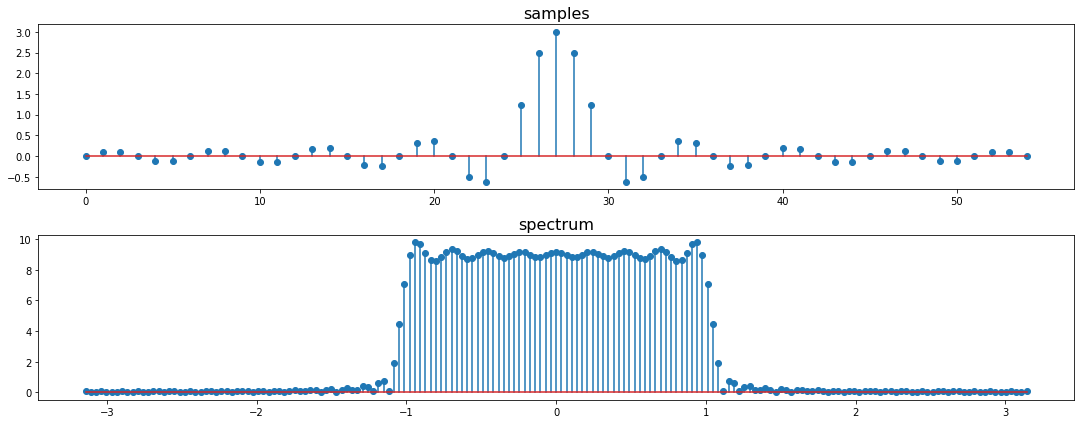

In [24]:
h = filtering.raised_cosine_fir(w_cut_ratio = 1/3)
H = fourier.dtft(h)

### Â∞á Delta ÊøæÊ≥¢ÔºåÂè™Ââ©‰∏ã $\omega_{N} = \frac{\pi}{3}$ ‰ª•ÂÖßÁöÑÈÉ®ÂàÜ

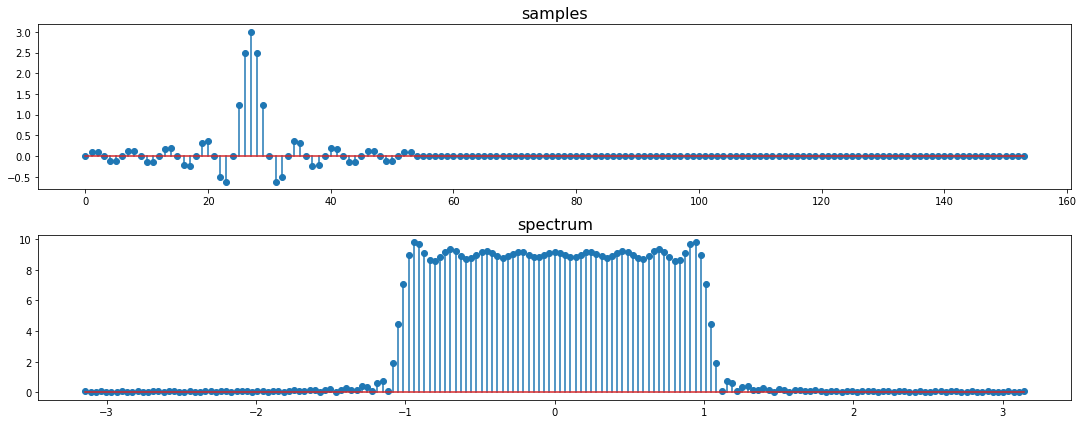

In [25]:
delta1 = np.convolve(delta, filtering.raised_cosine_fir(w_cut_ratio = 1/3))
Delta1 = fourier.dtft(delta1)

### Fit signal into channel

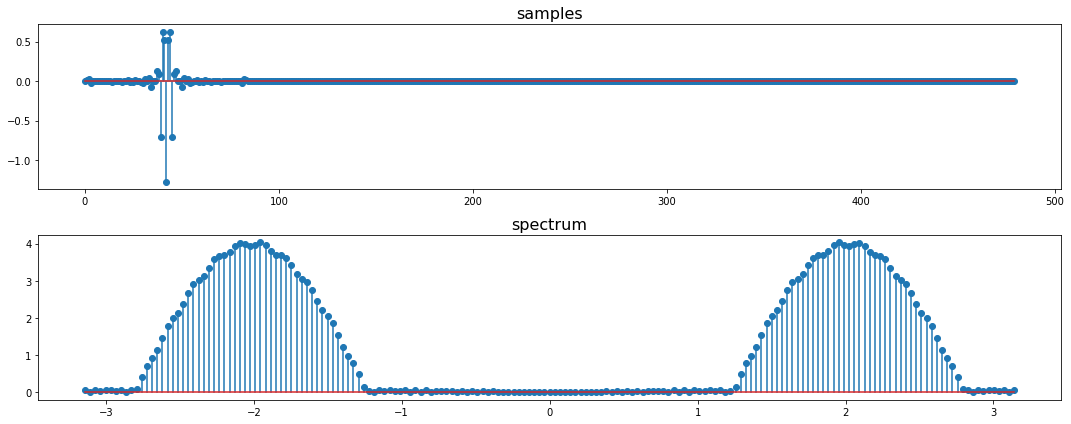

In [26]:
Fmin = 4400  # channel ÂÖÅË®±ÁöÑÈ†ªÁéá‰∏ãÈôê
Fmax = 10000  # channel ÂÖÅË®±ÁöÑÈ†ªÁéá‰∏äÈôê

K, Fs, w_center, w_cut, h, signal_baseband, signal_passband = filtering.fit_spectrum(d, Fmin, Fmax)  

_ = fourier.dtft(signal_passband)

## 6.3.a Noise and probability of error

The sequence received at the receiver inevitably contains some form of noise. For each symbol, if the noise level is high, the receiver wrongly interpret the symbol for another one in the alphabet. It makes a decoding error. The probability of decoding error depends on three factors

- the signal-to-noise ratio, i.e., the power of the signal with respect to the power of the noise, SNR is expressed in dB. Through SNR, the power constraints of the channel enters in the design problem and we cannot operate at an arbitrarily high SNR
- the decoding strategy, i.e., how smart we are at circumventing the effect of noise
- the choice of alphabet. If we increase the size of the alphabet, we can transmit more information per symbol but symbols are closer in the alphabet and the probability of error increases.


## 6.3.b PAM and QAM

### PAM ([Pulse-amplitude modulation](https://en.wikipedia.org/wiki/Pulse-amplitude_modulation))

$$
\begin{align}
P_{err} &= P[\eta[n] \lt -G \space | \space nth \space bit \space = 1] + P[\eta[n] \gt G \space | \space nth-bit \space = 0] \\
 &= ( P[\eta[n] \lt -G \space ] + P[\eta[n] \gt G \space  ]) / 2 \\
 &= P[\eta[n] \gt G \space  ]  \\
 &= \int_G^{\infty} \frac{1}{\sqrt{2\pi \sigma_0^2}} e^{-\frac{\tau^2}{2\sigma_0^2}} d\tau  \\
 &= erfc(\frac{G}{\sigma_0}) \space ; \sigma_{signal}^2 = G^2 \\
 &= erfc(\frac{\sigma_{signal}}{\sigma_0})  \\
 &= erfc(\sqrt{SNR})
\end{align}
$$

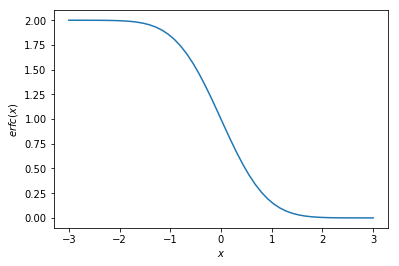

In [27]:
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erfc(x))
plt.xlabel('$x$')
plt.ylabel('$erfc(x)$')
plt.show()

[2 0 1 1 2 3 1 2 3 0 2 1 2 2 0 1 3 2 0 3]
[2 0 1 1 2 3 1 2 3 0 2 1 2 2 0 1 3 2 0 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True


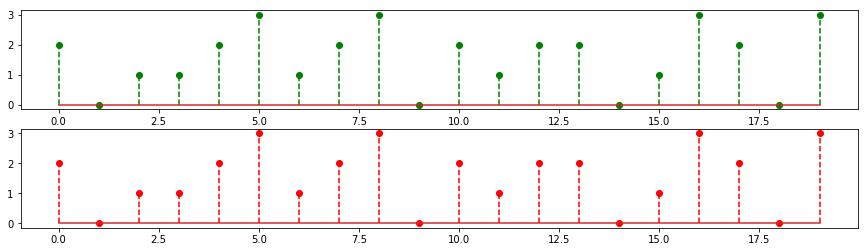

In [28]:
M = 2  # bits per symbol
values, pam_symbols, value_to_symbol, symbol_to_value = mapper.pam_mapping(M = M)

size = 20
sent_values = np.random.choice(values, size = size)

gain = 1.0
sent_symbols = gain * value_to_symbol(sent_values)

noise = np.random.randn(len(sent_symbols)) * 0.3
received_symbols = sent_symbols + noise

received_values = symbol_to_value(received_symbols) 

print(sent_values)
print(received_values)
print(received_values - sent_values)
print(np.allclose(received_values, sent_values))

plt.figure(figsize = (15, 4))
plt.subplot(2, 1, 1)
plt.stem(sent_values, linefmt = 'g--', markerfmt = 'go')
plt.subplot(2, 1, 2)
plt.stem(received_values, linefmt = 'r--', markerfmt = 'ro')
plt.show()

### QAM ([Quadrature amplitude modulation](https://en.wikipedia.org/wiki/Quadrature_amplitude_modulation))

$$
\begin{align}
\sigma_s^2 &= G^2\frac{1}{2^M} \sum_{a \in A} |a|^2 \\
&= G^2\frac{2}{3}(2^M-1) \\
\end{align}
$$


$$
\begin{align}
P_{err} &= P[|Re(\eta[n])| \gt G ] +  P[|Im(\eta[n])| \gt G ]  \\
 &= 1 - ùëÉ[|ùëÖùëí(ùúÇ[ùëõ])|\lt ùê∫ \land |ùêºùëö(ùúÇ[ùëõ])|\lt ùê∫] \\
 &= P[\eta[n] \gt G \space  ]  \\
 &= 1- \int_D f_{\eta}(z) dz  \\
 &\approx e^{-\frac{G^2}{\sigma_0^2}}  \\
 &\approx e^{-3\times 2^{-(M+1)}SNR}  \\
\end{align}
$$

#### Recipe: 
- pick a $P_{err}$ (e.g. $10^{-6}$)
- find the SNR imposed by the channel's power constrain
- $M = log_2(1-\frac{3}{2}\frac{SNR}{ln(P_{err})})$
- final throughput = MW

[ 179 3704   19 2568  560 1391 3625 2631   27  155  306  815 3829  824
 2900  888 3087  626 3211 2673]
[ 179 3704   19 2568  560 1391 3625 2631   27  155  306  815 3829  824
 2900  888 3087  626 3211 2673]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True


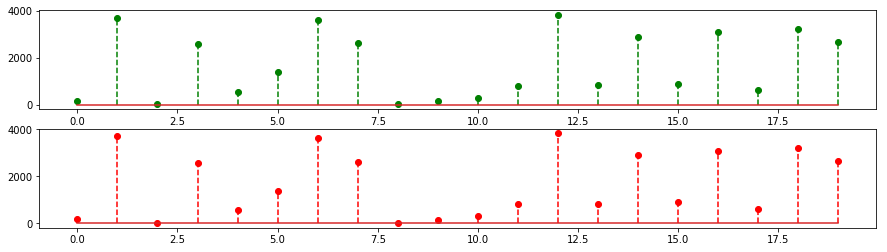

In [29]:
M = 12  # bits per symbol
values, qam_symbols, value_to_symbol, symbol_to_value = mapper.qam_mapping(M = M)

size = 20
sent_values = np.random.choice(values, size = size)

gain = 1.0
sent_symbols = gain * value_to_symbol(sent_values)

noise = (np.random.randn(len(sent_symbols)) + 1j* np.random.randn(len(sent_symbols))) * 0.3
received_symbols = sent_symbols + noise
received_values = symbol_to_value(received_symbols) 

print(sent_values)
print(received_values)
print(received_values - sent_values)
print(np.allclose(received_values, sent_values))

plt.figure(figsize = (15, 4))
plt.subplot(2, 1, 1)
plt.stem(sent_values, linefmt = 'g--', markerfmt = 'go')
plt.subplot(2, 1, 2)
plt.stem(received_values, linefmt = 'r--', markerfmt = 'ro')
plt.show()

## 6.4.a Modulation and demodulation


### passband signal
$$
\begin{align}
s[n] &= Re\{b[n]e^{j\omega_cn} \}  \\
&= Re\{(b_r[n] + jb_i[n]) (cos(\omega_c n) + jsin(\omega_c n) \}  \\
&= b_r[n]cos(\omega_c n) - b_i[n]sin(\omega_c n)  \\ 
\end{align}
$$

### recovery of baseband signal
$$
\begin{align}
s[n]cos(\omega_c n) &= b_r[n]cos(\omega_c n)cos(\omega_c n) - b_i[n]sin(\omega_c n)cos(\omega_c n)  \\ 
&=b_r[n]\frac{1+cos(2\omega_c n)}{2} - b_i[n]\frac{sin(2\omega_c n)}{2} \\
&= \frac{1}{2}b_r[n] +  \frac{1}{2}(b_r[n]cos(2\omega_c n) - b_i[n]sin(2\omega_c n))  \\
\\
s[n]sin(\omega_c n) &= b_r[n]cos(\omega_c n)sin(\omega_c n) - b_i[n]sin(\omega_c n)sin(\omega_c n)  \\ 
&=b_r[n]\frac{sin(2\omega_c n)}{2} - b_i[n]\frac{1+cos(2\omega_c n)}{2} \\
&= -\frac{1}{2}b_i[n] +  \frac{1}{2}(b_r[n]sin(2\omega_c n) - b_i[n]cos(2\omega_c n))  \\
\end{align}
$$

## 6.4.b Design example

In [30]:
Fmin = 450
Fmax = 2850
(Fmin, Fmax, bandwidth, F_center,  F_cut), (W, K, Fs, Ts, F_nyquist), freq_to_pi, (w_min, w_max, w_center, w_cut) = \
    dsp.parse_bandwidth(Fmin, Fmax)

(Fmin, Fmax, F_center, bandwidth, F_cut), (W, K, Fs, Ts, F_nyquist), freq_to_pi, (w_min, w_max, w_center, w_cut)

In [31]:
w_center/np.pi

In [32]:
SNR_dB = 22
Perr = 1e-6
M = mapper.get_M(SNR_dB, Perr)
M 

4

In [33]:
W = 2400
C = dsp.channel_capacity(W, SNR_dB)
C

### Transmit

#### original signal

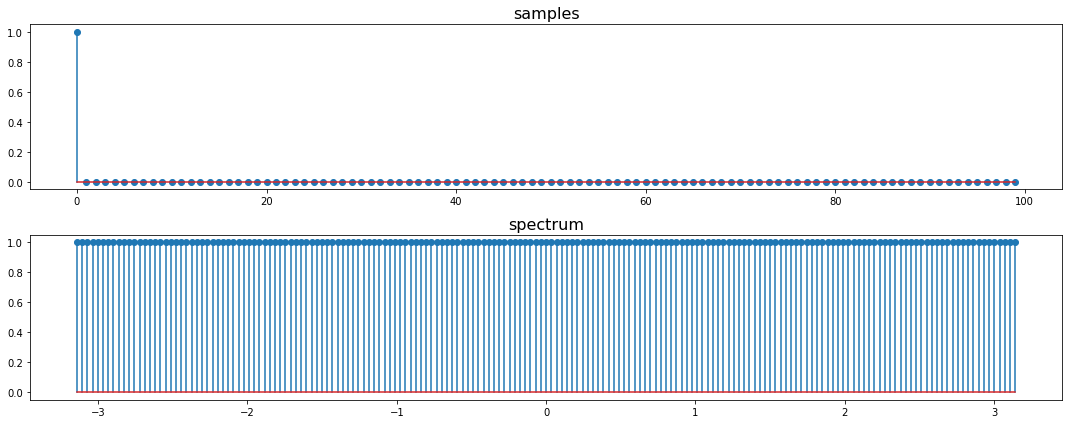

In [34]:
# Delta Ë®äËôüÔºåÂÖ®È†ª
delta = np.zeros(100)
delta[:1] =1
Delta = fourier.dtft(delta)

#### mapper

In [35]:
# a = mapper.qam_mapping()

#### up sampling
#### low-pass
#### modulate to passband

In [36]:
(Fmin, Fmax, F_center, bandwidth, F_cut, F_nyquist)

In [37]:
a = delta 
K, Fs, w_center, w_cut, h, signal_baseband, signal_passband = filtering.fit_spectrum(a, Fmin, Fmax)

#### baseband signal

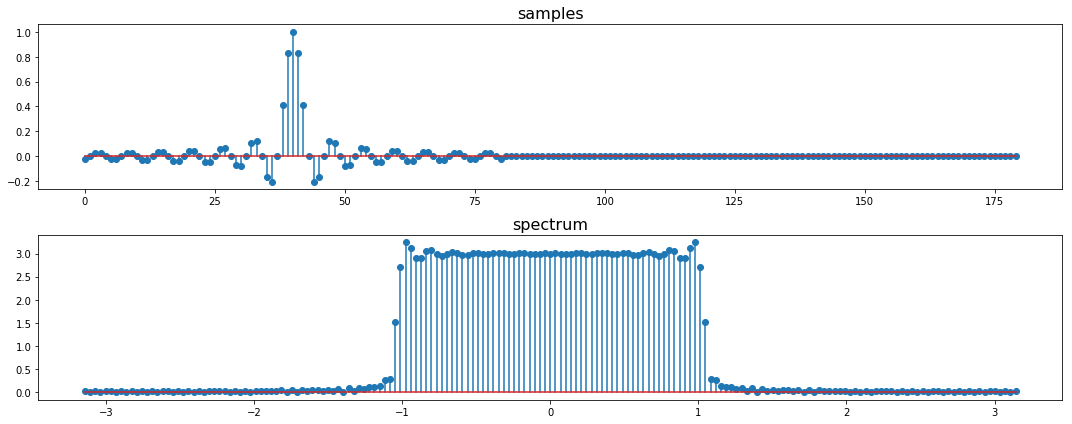

In [38]:
_ = fourier.dtft(np.convolve(a, h))

#### passband signal

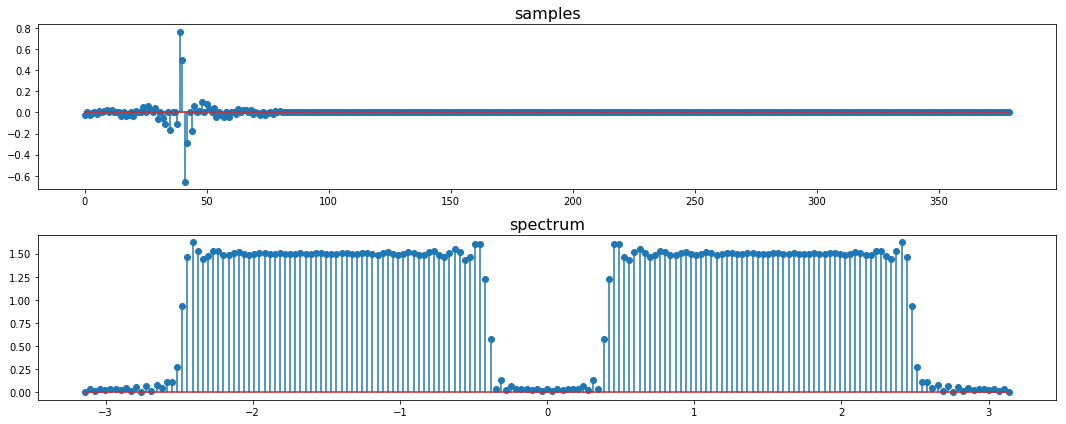

In [39]:
_ = fourier.dtft(signal_passband)

### Receiving

#### demodulate to baseband

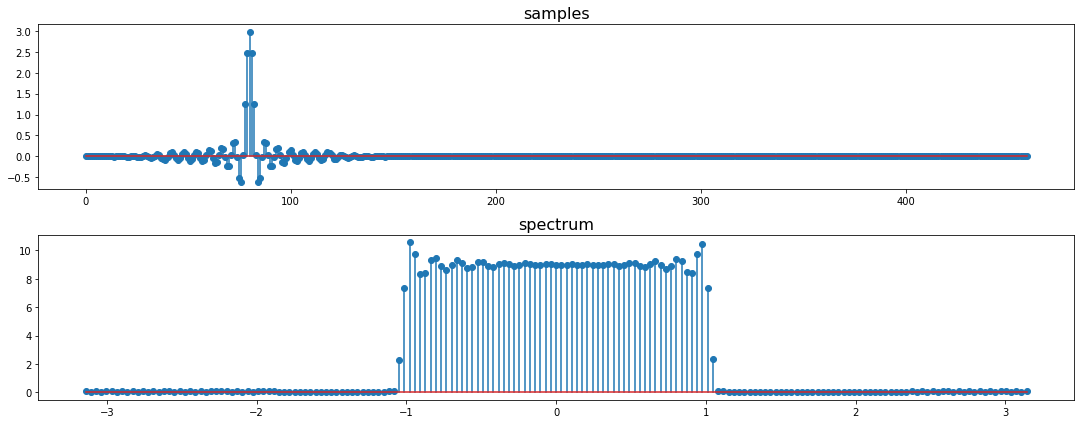

In [40]:
signal_baseband = filtering.demodulate_passband_to_baseband(signal_passband, w_center, h = h, w_cut = None)
# signal_baseband = filtering.demodulate_passband_to_baseband(signal_passband, w_center,  w_cut = w_cut)
_ = fourier.dtft(signal_baseband)

#### down sampling

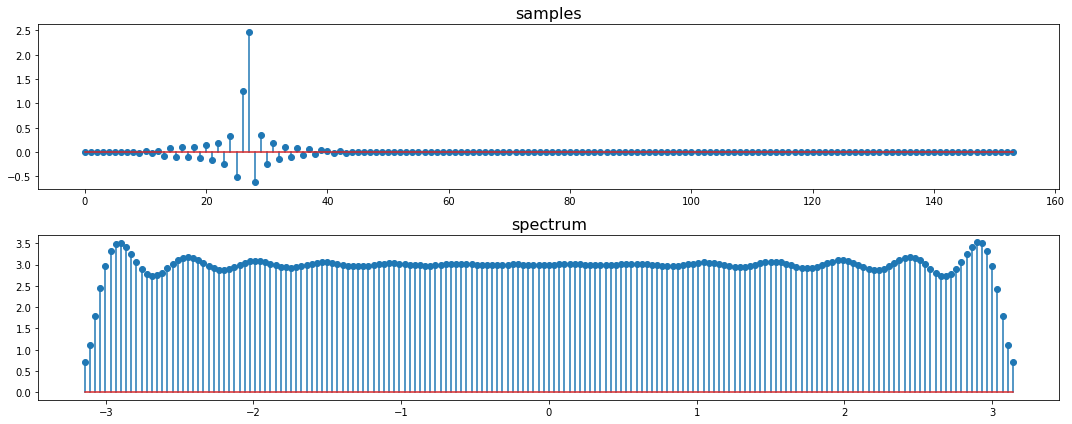

In [41]:
_ = fourier.dtft(multirate.downsample(signal_baseband, K))

#### mapper from symbols to values

## Frequency-Shift Keying (FSK)

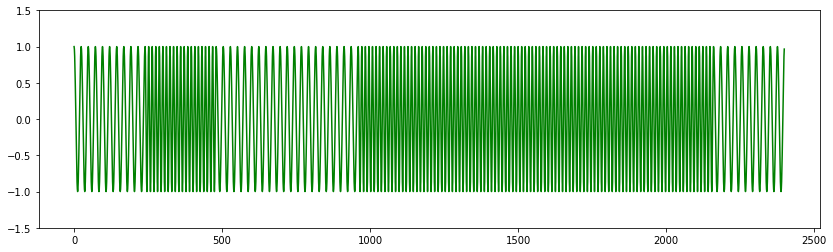

In [42]:
Fs = 24000
BITS = 500
b = np.sign(np.random.randn(BITS, 1))

BPS = 100             #  bits per second 
SPB = int(Fs / BPS)   #  samples per bit 

x = filtering.fsk(b, freq_mapping = {-1: 1000, 1: 2000}, Fs = Fs, bits_per_second  = BPS)

plt.figure(figsize=(14,4))
plt.plot(x[0:SPB*10], 'green')
plt.ylim([-1.5, 1.5]);

IPython.display.Audio(x, rate=Fs)

## 6.5.b Delay compensation

Receiver ÁöÑ clock ‰∏ç‰∏ÄÂÆöÂíå transmitter ‰∏ÄËá¥ÔºåÊâÄ‰ª•Êé•Êî∂Âà∞Ë®äËôü‰πãÂæåÂÅö sampling Âá∫‰æÜÁöÑ samples ÊúÉÂíåÂéüÊú¨ÁôºÈÄÅÊñπÁöÑ samples ‰∏ç‰∏ÄËá¥ÔºåÊâÄ‰ª•Ë¶Å‰º∞Ë®à delay ‰ª•‰æø receiver ÂèØ‰ª•‰øÆÊ≠£ÂèñÊ®£ÁöÑÂÄºÔºå‰ª•‰æøÂèØ‰ª•ÈÇÑÂéüÂéüÊú¨ÁöÑË®äËôü„ÄÇ

Total delay $d = (b + \tau) Ts$Ôºö
- b: bulk delay: just set the maximum sampled peak as $n = 0$
- $\tau$: fractional delay ÈúÄË¶ÅËóâÁî±ÈõôÊñπÂ∑≤Á∂ìÁü•ÈÅìÁöÑÈ†ªÁéá‰æÜÊ∫ùÈÄöÊ∏¨Èáè

### Estimating the fractional delay

Transmitter: 
$$
\begin{align}
b[n] &= e^{j\omega_0 n }  \\
s[n] &= cos((\omega_c + \omega_0) n ))  \\
\end{align}
$$

Receiver: 
$$
\begin{align}
\hat{s}[n] &= cos((\omega_c + \omega_0)(n - b - \tau))  \\
\end{align}
$$

after demodulation and buld delay offset: 
$$
\begin{align}
\hat{b}[n] &= e^{j\omega_0(n-\tau)}  \\
\end{align}
$$


multiply by known frequency: 
$$
\begin{align}
\hat{b}[n] e^{-j\omega_0 n} &= e^{j\omega_0(n-\tau)} e^{-j\omega_0 n}  \\
&= e^{-j\omega_0(\tau - n)} e^{-j\omega_0 n} \\
&= e^{-j\omega_0 \tau}  \\
\end{align}
$$

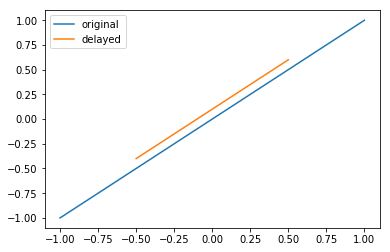

In [43]:
t = np.linspace(-1, 1, 5)

# x = np.sin(t)
x = t
tau = 0.2

li = Lagrange()
x_delayed = li.fractional_delay(x, tau = tau)

plt.plot(t, x, label = 'original');
plt.plot(t, x_delayed, label = 'delayed')
plt.legend();

## 6.5.c Adaptive equalization

## 6.6.a ADSL design
Center frequency of each subchannel:
$$
\omega_k = 2\pi \frac{\frac{kF_{max}}{N}}{F_s} = \frac{2\pi}{2N}k \\
$$

Bandwidth of each subchannel:
$$
 \frac{2\pi}{2N} \\
$$

To send symbols over a subchannle: upsampling factor $K \geq 2N$

## 6.6.b Discrete multitone modulation

$$
\begin{align}
a_k[\lfloor \frac{n}{2N} \rfloor] \times e^{j(\frac{2\pi}{2N})n k } &= c_k[n]  \\
 c_k[n] &= \sum_{k=0}^{N-1} a_k[\lfloor \frac{n}{2N} \rfloor] \times e^{j(\frac{2\pi}{2N})n k }   \\
 &= 2N \times IDFT_{2N}\{[a_0[m], a_1[m],...,a_{N-1}[m],0,0,...,0] \}[n] & (m = \lfloor \frac{n}{2N} \rfloor ) \\
\\
IDFT\{[x_0, x_1, x_2,...,x_{N-2}, x_{N-1}] \}^* &= IDFT\{[x_0, x_{N-1},x_{N-2},...,x_2,x_1 ]^* \} \\
\\
s[n] &= Re\{c[n]\} = (c[n] + c^*[n]) / 2  \\
&= N \times IDFT\{[a_0[m], a_1[m],...,a_{N-1}[m],0,0,...,0] \}[n] + N \times IDFT_{2N}\{[a_0^*[m], ,0,0,...,0,a_{N-1}^*[m],...,a_1^*[m]] \}[n]  \\
&= N \times IDFT\{[2a_0[m], a_1[m],...,a_{N-1}[m],a_{N-1}^*[m],...,a_1^*[m]] \}[n] \\
\end{align}
$$  



## 7.1* Introduction to image processing

- Separable signals: 
$$
\delta[xy] = \delta[x]\delta[y]  \\
$$

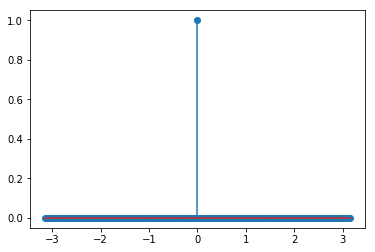

In [44]:
w = dsp.get_freq_bins()
dx = dy = dsp.delta(w)
plt.stem(w, dx);

In [45]:
X, Y = np.meshgrid(w, w)

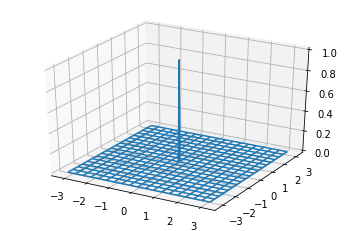

In [46]:
Z = dxy = np.outer(dx, dy)

ax = plt.subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
plt.show() 

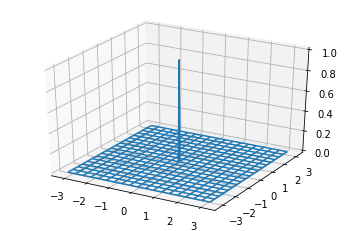

In [47]:
Z = dxy = dsp.delta_2D(X, Y)

ax = plt.subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
plt.show() 

- Separable signals: 
$$
\delta[xy] = \delta[x]\delta[y]  \\
rect(\frac{n1}{N1}, \frac{n2}{N2}) = rect(\frac{n1}{N1}) rect(\frac{n2}{N2})\\
$$

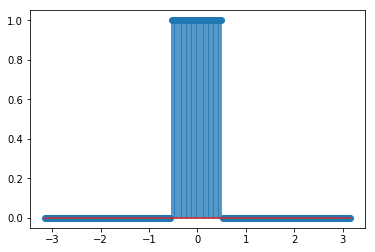

In [48]:
w = dsp.get_freq_bins()
rx = ry = dsp.rect(w, width = np.pi/3)
plt.stem(w, rx);

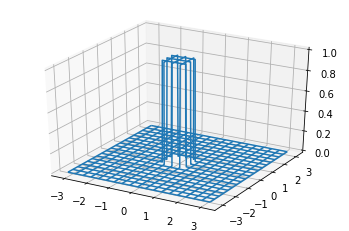

In [49]:
Z = rxy = np.outer(rx, ry)

ax = plt.subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
plt.show() 

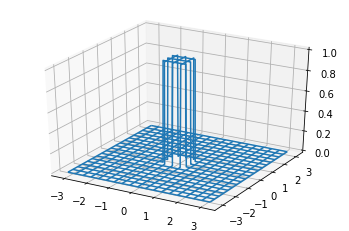

In [50]:
Z = rxy = dsp.rect_2D(X, Y)

ax = plt.subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
plt.show() 

### Non-separable signals

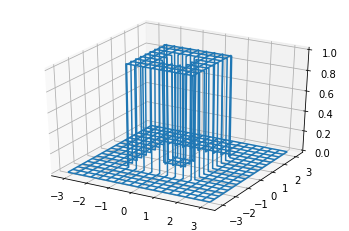

In [51]:
Z1 = dsp.rect_2D(X, Y, 3, 3)
Z2 = dsp.rect_2D(X, Y, 1, 1)

ax = plt.subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z1-Z2, rstride = 10, cstride = 10)
plt.show() 

### 2D convolution
$$
\begin{align}
x[n_1, n_2]*h[n_1, n_2] = \sum_{k_1 = -\infty}^{\infty} \sum_{k_2 = -\infty}^{\infty} x[k_1, k_2]h[n_1-k_1, n_2-k_2] \\
\end{align}
$$

If signals are separable:
   $$h[n_1,n_2] = h_1[n_1]h_2[n_2]$$
then:
$$
\begin{align}
x[n_1, n_2]*h[n_1, n_2] &= \sum_{k_1 = -\infty}^{\infty} h_1[n_1-k_1] \sum_{k_2 = -\infty}^{\infty} x[k_1, k_2]h_2[n_2-k_2] \\
&= h_1[n_1]*(h_2[n_2] * x[n_1, n_2]) \\
\end{align}
$$

## 7.2* Image manipulations

### Affine transforms

$$ 
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    d_1 \\ 
    d_2
\end{bmatrix} 
\\     
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\textbf{A}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-\textbf{d}
\end{align}
$$


- Translation:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    1 & 0 \\
    0 & 1
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    d_1\\
    d_2
\end{bmatrix}
\end{align}
$$

- Scaling:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    a_1 & 0 \\
    0 & a_2
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    0\\
    0
\end{bmatrix}
\end{align}
$$

- Rotation:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    cos\theta & -sin\theta \\
    sin\theta  & cos\theta
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    0\\
    0
\end{bmatrix}
\end{align}
$$

- H Flip:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    -1 & 0 \\
    0  & 1
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    0\\
    0
\end{bmatrix}
\end{align}
$$

- V Flip:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    1 & 0 \\
    0  & -1
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    0\\
    0
\end{bmatrix}
\end{align}
$$

- H Shear:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    1 & s \\
    0  & 1
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    0\\
    0
\end{bmatrix}
\end{align}
$$

- V Shear:
$$  
\begin{align}
\begin{bmatrix}
    t_1^{\prime} \\
    t_2^{\prime}
\end{bmatrix}
&= 
\begin{bmatrix}
    1 & 0 \\
    s & 1
\end{bmatrix}
\begin{bmatrix}
    t_1 \\
    t_2
\end{bmatrix}
-
\begin{bmatrix}
    0\\
    0
\end{bmatrix}
\end{align}
$$

## 7.3* Frequency analysis

### 2D DFT
- DFT:
$$  
\begin{align}
\textbf{W}_N &= 
\begin{bmatrix}
1 & 1 & 1 & 1 & \dots & 1  \\
1 & W_N^1 & W_N^2 & W_N^3  & \dots & W_N^{{N-1}}  \\
1 & W_N^2 & W_N^4 & W_N^6  & \dots & W_N^{2(N-1)}  \\
& & & &  \dots \\
1 & W_N^{N-1} & W_N^{2(N-1)} & W_N^{3(N-1)}  & \dots & W_N^{(N-1)(N-1)}  \\
\end{bmatrix}
\\
\\
\textbf{x} &= x[n_1, n_2] \\
\\
\textbf{X} = DFT\{\textbf{x}\} = DFT\{x[n_1, n_2]\} = X[k_1, k_2] &= \sum_{n_1=0}^{N_1-1} \sum_{n_2 = 0}^{N_2-1} x[n_1, n_2]e^{-j\frac{2\pi}{N_1}n_1k_1} e^{-j\frac{2\pi}{N_2}n_2k_2}  \\
&= \sum_{n_1=0}^{N_1-1} \Bigg[\sum_{n_2 = 0}^{N_2-1} x[n_1, n_2]e^{-j\frac{2\pi}{N_1}n_1k_1} \Bigg] e^{-j\frac{2\pi}{N_2}n_2k_2}  \\
\textbf{V} &= \sum_{n_2 = 0}^{N_2-1} x[n_1, n_2]e^{-j\frac{2\pi}{N_1}n_1k_1}  & \textbf{V} \in \mathbb{C}^{N_2\times N_1}\\  
 &= \textbf{W}_{N_2} \textbf{x} \\
\textbf{X} &= \textbf{V} \textbf{W}_{N_1} & \textbf{X} \in \mathbb{C}^{N_2\times N_1} \\
&=  \textbf{W}_{N_2} \textbf{x} \textbf{W}_{N_1}
\end{align}
$$

- IDFT:
$$
\begin{align}
x[n_1, n_2] &= \frac{1}{N_1 N_2} \sum_{n_1=0}^{N_1-1} \sum_{n_2 = 0}^{N_2-1} 
X[k_1, k_2] e^{j\frac{2\pi}{N_1}n_1k_1} e^{j\frac{2\pi}{N_2}n_2k_2}  \\
\end{align}
$$

There are $N_1 N_2$ orthogonal basis vectors for $ N_1 \times N_2$ image:
$$
\begin{align}
w_{k_1, k_2}[n_1, n_2] &=  e^{j\frac{2\pi}{N_1}n_1k_1} e^{j\frac{2\pi}{N_2}n_2k_2} \\
n_1, k_1 = 0, 1,...,N_1-1 \space &and \space n_2, k_2 = 0,1,...,N_2-1  \\
\end{align}
$$

## 7.4* Image filtering

### FIR filter for images
- Moving average

$$
\begin{align}
y[n_1, n_2] &= \frac{1}{(2N + 1)^2} \sum_{k_1 = -N}^N \sum_{k_2 = -N}^N x[n_1 - k_1,n_2-k_2] \\
h[n_1,n_2] &=  \frac{1}{(2N + 1)^2} rect(\frac{n_1}{2N}, \frac{n_2}{2N})  \\
&=  \frac{rect(\frac{n_1}{2N})}{(2N + 1)} \frac{rect(\frac{n_2}{2N})}{(2N + 1)} \\
\\
h[n_1,n_2] &= 
\frac{1}{9}
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \\
\end{bmatrix}
\end{align}
$$

- Gaussian Blur:

$$
\begin{align}
h[n_1,n_2] &=  \frac{1}{2\pi\sigma^2} e^{-\frac{n_1^2+n_2^2}{2\sigma^2}}, & |n_1,n_2| \lt N \\
&=  \frac{1}{\sqrt{2\pi}\sigma } e^{-\frac{n_1^2}{2\sigma^2}}  \frac{1}{\sqrt{2\pi}\sigma } e^{-\frac{n_2^2}{2\sigma^2} } \\ 
truncate \space around \space N &\approx 3\sigma \\
\end{align}
$$

- H Sobel filter:
  - approximate the first derivative in the horizontal direction:  
  
$$
\begin{align}
s_o[n_1,n_2] 
&= 
\begin{bmatrix}
-1 & 0 & 1  \\
-2 & 0 & 2 \\
-1 & 0 & 1  \\
\end{bmatrix}  \\
&= 
\begin{bmatrix}
1  \\
2  \\
1  \\
\end{bmatrix}
\begin{bmatrix}
-1 & 0 & 1\\
\end{bmatrix}
\end{align}
$$

- V Sobel filter:
  - approximate the first derivative in the vertical direction:  
  
$$
\begin{align}
s_o[n_1,n_2] 
&= 
\begin{bmatrix}
-1 & -2 & 1  \\
0 & 0 & 0 \\
1 & 2 & 1  \\
\end{bmatrix}  \\
&= 
\begin{bmatrix}
-1 \\ 0 \\ 1\\
\end{bmatrix}
\begin{bmatrix}
1  &
2  &
1  &
\end{bmatrix}
\end{align}
$$


- Sobel operator:  

$$
\begin{align}
|\nabla x[n_1,n_2]|^2 &= |s_o[n_1,n_2]*x[n_1,n_2]|^2 + |s_v[n_1,n_2]*x[n_1,n_2]|^2  \\
\end{align}
$$

- Laplacian operator:  

$$
\begin{align}
\Delta f(t_1,t_2) &= \frac{\partial^2 f}{\partial t_1^2} + \frac{\partial^2 f}{\partial t_2^2}  \\
f^{\prime \prime} &= \frac{1}{\tau^2}(f(t-\tau)-2f(t)+f(t+\tau))  \\
h &= 
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1  \\
0 & 1 & 0 \\
\end{bmatrix} \\
&= 
\begin{bmatrix}
0 & 0 & 0 \\
1 & -2 & 1  \\
0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
0 & 1 & 0 \\
0 & -2 & 0  \\
0 & 1 & 0 \\
\end{bmatrix}
\end{align}
$$

## 7.5* Image compression
Ingradients:
- compressing in block level
- Transform coding
  - [DCT (Discrete Cosine Transform)](https://en.wikipedia.org/wiki/Discrete_cosine_transform)
- Smart quantization
  - Deadzone quantizer
  - some coefficients are more important
  - find out the critical coefficients by expreimentation
    - Psychovisually-tuned quantization table
    - Zigzag scan to maximize ordering
        - Run-length encoding symbols $\big{[} (r, s), c\big{]}$ :
          - r: runlength, the number of zeros between the current value and last non-zero value.
          - s: the size, the number of bits needed to encode the value.
          - c: the actual value.
          - (0,0) indicates that form now on it's only zeros (end of block).
    - Variable-length encoding
      - prefix-free codes
  - allocate more bits tot the most important coefficients  -
- Entropy coding
  - Run-length encoding
  - Huffman coding

### [DCT (Discrete Cosine Transform)](https://en.wikipedia.org/wiki/Discrete_cosine_transform)
- DCT-II:
$$
\begin{align}
X[k] &= \sum_{n=0}^{N-1} x[n] cos \big{[}\frac{\pi}{N}k(n + \frac{1}{2})\big{]}  & k = 0,...,N-1 \\
\end{align}
$$

- DCT-III:
$$
\begin{align}
X[k] &= \frac{1}{2}x_0 + \sum_{n=1}^{N-1} x[n] cos \big{[}\frac{\pi}{N}n(k + \frac{1}{2})\big{]}  & k = 0,...,N-1 \\
\end{align}
$$

- IDCT-II = DCT-III   $\times \frac{2}{N} $ 



- 2D-DCT:
$$
\begin{align}
C[k_1,k_2] &= \sum_{n_1=0}^{N-1}\sum_{n_2=0}^{N-1} x[n_1,n_2] cos \big{[}\frac{\pi}{N}(n_1 + \frac{1}{2})k_1 \big{]} cos \big{[}\frac{\pi}{N}(n_2 + \frac{1}{2})k_2 \big{]} 
\end{align}
$$

### Quantization
- standard quantization:  
$\hat{x} = floor(x) + 1/2$  


- Deadzone quantization:  
$\hat{x} = round(x) $  


- Entropy coding:
